In [2]:
!pip install keras


In [3]:
import urllib.request
url = 'https://www.dropbox.com/sh/2idnozs4741hzkr/AABXTlPlU-1f4L_VdS4wY06ca?dl=0'
filename = 'cat'
urllib.request.urlretrieve(url, filename)


('cat', <http.client.HTTPMessage at 0x1fef2dd8ac0>)

In [4]:
import os,shutil
folders = os.listdir("images")

In [5]:
if not os.path.isdir("val_images"):
    os.mkdir("val_images")
classes = ["dogs","cats","horses","humans"]

In [6]:
for c in classes:
    p = os.path.join("val_images",c) #val_images/cats
    if not os.path.isdir(p):
        os.mkdir(p)
      
SPLIT = 0.9
for f in os.listdir("images"):
    path = "images/"+f
    imgs = os.listdir(path)
    
    split_size = int(SPLIT*len(imgs))
    files_to_move = imgs[split_size:]
    #print(len(files_to_move))
    #print(files_to_move)
    for img_f in files_to_move:
        src = os.path.join(path,img_f)
        dest = os.path.join("val_images/"+f,img_f)
        shutil.move(src,dest)
        #print(src)
        #print(dest)

In [7]:
print("Training Data")
for f in folders:
    path = "images/"+f
    print(f+ " "+str(len(os.listdir(path))))
   

print("\n Validation Data") 
for f in folders:
    path = "val_images/"+f
    print(f+ " "+str(len(os.listdir(path))))

Training Data
cats 145
dogs 145
horses 145
humans 145

 Validation Data
cats 57
dogs 57
horses 57
humans 57


In [8]:
from IPython.display import display
from PIL import Image

In [9]:
from keras.preprocessing import image
from matplotlib import pyplot as plt


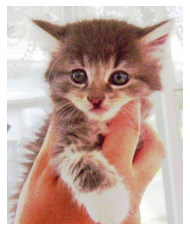

In [10]:
sample_path = "images/cats/cat.100.jpg"
img = image.load_img(sample_path)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

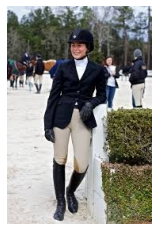

In [11]:
sample_path1 = "images/humans/rider-103.jpg"
img = image.load_img(sample_path1)
x = image.img_to_array(img)/255.0
plt.imshow(img)
plt.axis("off")
plt.show()

In [12]:
from keras.layers import *
from keras.models import Sequential

In [13]:
#model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator



adam=optimizers.Adam(lr=1e-4)
model.compile(loss='categorical_crossentropy', optimizer=adam,metrics=['acc'])

In [15]:
#model.fit() #useful when dataset is small and it can fit inside the memory

train_gen = ImageDataGenerator(rescale=1.0/255)
val_gen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_gen.flow_from_directory(
    "images/",
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

val_generator = train_gen.flow_from_directory(
    "val_images/",
    target_size=(150,150),
    batch_size=32,
    class_mode = 'categorical'
)

Found 580 images belonging to 4 classes.
Found 228 images belonging to 4 classes.


In [16]:
for x,y in train_generator:
    print(x.shape)
    print(y.shape)
    break

(32, 150, 150, 3)
(32, 4)


In [20]:
#train our model

history = model.fit_generator(
    train_generator,
    epochs=50,
    steps_per_epoch = 7,
    validation_data= val_generator,
    validation_steps = 4
)

Epoch 1/50
7/7 [==============================] - 4s 596ms/step - loss: 0.3747 - acc: 0.8878 - val_loss: 0.9446 - val_acc: 0.5859
Epoch 2/50
7/7 [==============================] - 5s 693ms/step - loss: 0.4093 - acc: 0.8795 - val_loss: 0.9064 - val_acc: 0.6484
Epoch 3/50
7/7 [==============================] - 4s 577ms/step - loss: 0.3738 - acc: 0.8878 - val_loss: 0.9565 - val_acc: 0.5625
Epoch 4/50
7/7 [==============================] - 5s 678ms/step - loss: 0.3605 - acc: 0.8929 - val_loss: 0.8629 - val_acc: 0.6328
Epoch 5/50
7/7 [==============================] - 5s 753ms/step - loss: 0.3276 - acc: 0.9082 - val_loss: 0.9671 - val_acc: 0.5859
Epoch 6/50
7/7 [==============================] - 4s 629ms/step - loss: 0.3554 - acc: 0.8622 - val_loss: 1.0301 - val_acc: 0.5938
Epoch 7/50
7/7 [==============================] - 4s 634ms/step - loss: 0.4288 - acc: 0.8316 - val_loss: 1.3372 - val_acc: 0.5625
Epoch 8/50
7/7 [==============================] - 5s 700ms/step - loss: 0.4283 - acc: 0.83

In [22]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss= history.history['val_loss']

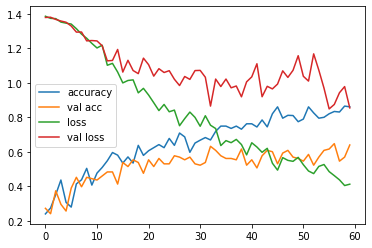

In [19]:

plt.plot(acc,label="accuracy")
plt.plot(val_acc,label="val acc")
plt.plot(loss,label='loss')
plt.plot(val_loss,label='val loss')
plt.legend()
plt.show()
